# Методы оптимизации
# Лабораторная работа №2
**Бирюков В.П. РК6-63Б**


Моде́ль Ло́тки — Вольте́рры — модель взаимодействия двух видов типа «хищник — жертва», названная в честь её авторов (Лотка, 1925; Вольтерра 1926), которые предложили модельные уравнения независимо друг от друга.

Такие уравнения можно использовать для моделирования систем «хищник — жертва», «паразит — хозяин», конкуренции и других видов взаимодействия между двумя видами.

В математической форме предложенная система имеет следующий вид:

$\frac{dx}{dt} = (\alpha - \beta y)x$  
$\frac{dy}{dt} = (-\gamma + \delta x)y$

где 
x — количество жертв;
y — количество хищников;
α, β, γ,  δ —  коэффициенты, отражающие взаимодействия между видами.

Рассматривается закрытый ареал, в котором обитают два вида — травоядные («жертвы») и хищники. Предполагается, что животные не иммигрируют и не эмигрируют, и что еды для травоядных животных имеется с избытком. Тогда уравнение изменения количества жертв (без учета хищников) принимает вид:

$\frac{dx}{dt} = \alpha x$ 
где
α — коэффициент рождаемости жертв

Пока хищники не охотятся, они вымирают, следовательно, уравнение для численности хищников (без учёта численности жертв) принимает вид:

$\frac{dy}{dt} = -\gamma y$  
где
γ — коэффициент убыли хищников

При встречах хищников и жертв (частота которых прямо пропорциональна величине xy) происходит убийство жертв с коэффициентом β, сытые хищники способны к воспроизводству с коэффициентом δ . 

In [81]:
from scipy.optimize import fsolve, minimize
import numpy as np
import math 
import matplotlib.pyplot as plt

In [82]:
x = 1
y = 1

def mark(parameters):
    alpha = parameters[0]
    beta  = parameters[1]
    gamma = parameters[2]
    delta = parameters[3]

    x_stac = gamma / delta
    y_stac = alpha / beta

    c = beta * y + delta * x - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x))
    
    def x_func(x):
        return beta * y_stac + delta * x - alpha * np.log(np.abs(y_stac)) \
               - gamma * np.log(np.abs(x)) - c
    
    def y_func(y):
        return beta * y + delta * x_stac - alpha * np.log(np.abs(y)) \ 
               - gamma * np.log(np.abs(x_stac)) - c

    min_x = fsolve(x_func, 0.00001)
    min_y = fsolve(y_func, 0.00001)
    return np.abs(min_y / min_x - 1.45)

SyntaxError: unexpected character after line continuation character (<ipython-input-82-0f43c226aefa>, line 20)

In [83]:
class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.00001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        self.pred_init = pred_init
        self.prey_init = prey_init
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        for i in range(self._n_iters - 1):
          self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
          self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        #plt.xlabel('time')
        #plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='black')
        plt.plot(self.time, self.prey, label='herbivores', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        #plt.xlabel('n predators')
        #plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='r')
        plt.grid()
        plt.show()

In [84]:
solution = minimize(mark, [1, 1, 1, 2])
print("alpha = ", round(solution.x[0], 4))
print("beta =  ", round(solution.x[1], 4))
print("gamma = ", round(solution.x[2], 4))
print("delta = ", round(solution.x[3], 4))

alpha =  1.1876
beta =   1.0075
gamma =  1.4806
delta =  1.8917


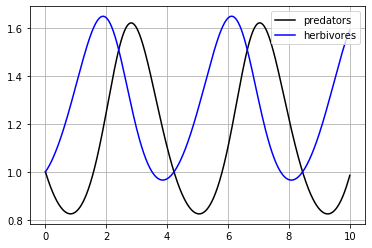

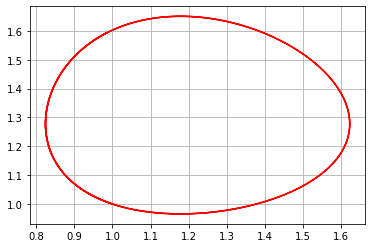

In [85]:
biome = Biome(pred_init=y, prey_init=x, tmax=10, dt=0.0001)
biome.run(solution.x[0], solution.x[1], solution.x[2], solution.x[3])
biome.plot()
biome.plot_cycle()